In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('/Users/rajatthakur/Desktop/SuperDataScienceML/CollaborationProjects/Edu-spend/International_Education_Costs.csv')

# Display basic information about the dataset
print("Dataset Info:")
print("-" * 50)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("\nColumns:")
print(df.columns.to_list())

# Display first few rows
display(df.head())

Dataset Info:
--------------------------------------------------
Number of rows: 907
Number of columns: 12

Columns:
['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years', 'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD', 'Exchange_Rate']


,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [8]:
# Data Quality Assessment

# 1. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 2. Check data types
print("\nData Types:")
print(df.dtypes)

# 3. Check for duplicate rows
print("\nNumber of duplicates:", df.duplicated().sum())

# 4. Basic statistics for numerical columns
print("\nBasic Statistics for Numerical Columns:")
print(df.describe())

# 5. Unique values count for categorical columns
print("\nUnique Values Count for Categorical Columns:")
categorical_cols = ['Country', 'City', 'University', 'Program', 'Level']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


Missing Values:
Country              0
City                 0
University           0
Program              0
Level                0
Duration_Years       0
Tuition_USD          0
Living_Cost_Index    0
Rent_USD             0
Visa_Fee_USD         0
Insurance_USD        0
Exchange_Rate        0
dtype: int64

Data Types:
Country               object
City                  object
University            object
Program               object
Level                 object
Duration_Years       float64
Tuition_USD            int64
Living_Cost_Index    float64
Rent_USD               int64
Visa_Fee_USD           int64
Insurance_USD          int64
Exchange_Rate        float64
dtype: object

Number of duplicates: 0

Basic Statistics for Numerical Columns:
       Duration_Years   Tuition_USD  Living_Cost_Index     Rent_USD  \
count      907.000000    907.000000         907.000000   907.000000   
mean         2.836825  16705.016538          64.437486   969.206174   
std          0.945449  16582.385275     

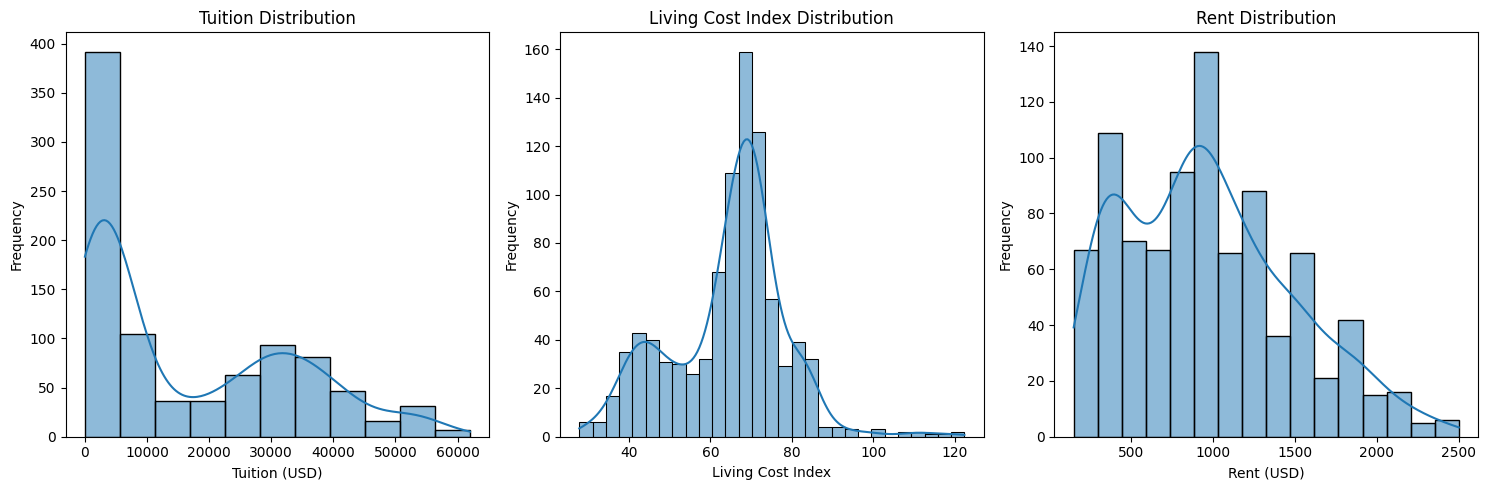

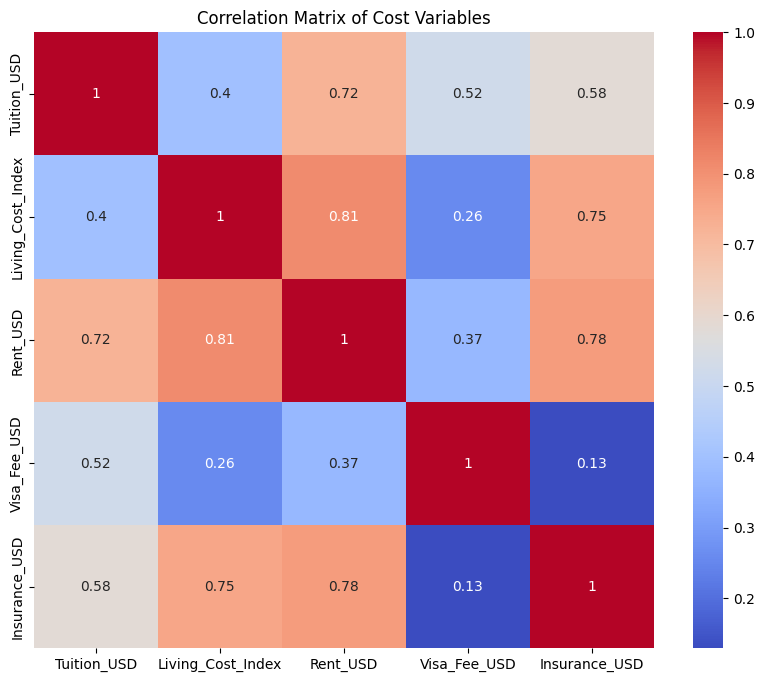

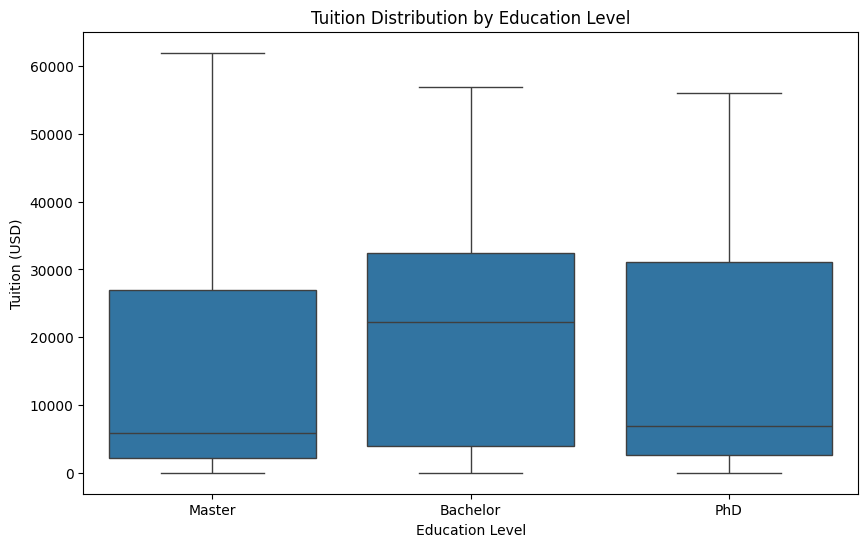

In [ ]:
# Descriptive Statistics and Visualization

# 1. Cost Distribution Analysis
plt.figure(figsize=(15, 5))

# Tuition Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Tuition_USD'], kde=True)
plt.title('Tuition Distribution')
plt.xlabel('Tuition (USD)')
plt.ylabel('Frequency')

# Living Cost Index Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Living_Cost_Index'], kde=True)
plt.title('Living Cost Index Distribution')
plt.xlabel('Living Cost Index')
plt.ylabel('Frequency')

# Rent Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Rent_USD'], kde=True)
plt.title('Rent Distribution')
plt.xlabel('Rent (USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Cost Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Cost Variables')
plt.show()

# 3. Cost by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Level', y='Tuition_USD', data=df)
plt.title('Tuition Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Tuition (USD)')
plt.show()



In [ ]:
'''
Lets understand the above heatmap 
This is like a relationship chart that shows how different costs are connected to each other.
 It's like seeing which things tend to go up or down together.
 Red means "when one goes up, the other tends to go up too" (positive relationship)
Blue means "when one goes up, the other tends to go down" (negative relationship)
The number (like 0.71 or 0.83) shows how strong the relationship is (closer to 1 = stronger)

Living Cost Index: 0.40
This is a moderate relationship
When tuition goes up, living costs tend to go up too, but not as strongly
Example: If tuition increases by $10,000, living costs might increase by about $4,000

Rent USD: 0.72
This is a strong relationship
When tuition is high, rent is usually high too
Example: If tuition increases by $10,000, rent might increase by about $7,200

Visa Fee USD: 0.52
This is a moderate relationship
More expensive universities tend to have slightly higher visa fees
Example: If tuition increases by $10,000, visa fees might increase by about $5,200

Insurance USD: 0.58
This is also a moderate relationship
More expensive universities tend to have slightly higher insurance costs
Example: If tuition increases by $10,000, insurance might increase by about $5,800

If you find a university with high tuition ($25,000+):
Expect high rent (0.72 correlation - strongest relationship)
Expect moderately high living costs (0.40 correlation)
Expect slightly higher visa and insurance costs (0.52 and 0.58 correlations)

Practical Tips:

When choosing a university:
Look for universities where high tuition doesn't mean extremely high rent (since rent has the strongest correlation)
Be prepared for higher costs all around if you choose a high-tuition university
Don't assume insurance will be much higher just because tuition is high
If you're on a budget:
Look for universities with lower tuition that aren't in very expensive cities
Consider universities where the rent isn't as strongly tied to tuition
Remember that visa fees and insurance costs might be slightly higher at more expensive universities

'''


'\nLets understand the above heatmap \nThis is like a relationship chart that shows how different costs are connected to each other.\n It\'s like seeing which things tend to go up or down together.\n Red means "when one goes up, the other tends to go up too" (positive relationship)\nBlue means "when one goes up, the other tends to go down" (negative relationship)\nThe number (like 0.71 or 0.83) shows how strong the relationship is (closer to 1 = stronger)\n\nLiving Cost Index: 0.40\nThis is a moderate relationship\nWhen tuition goes up, living costs tend to go up too, but not as strongly\nExample: If tuition increases by $10,000, living costs might increase by about $4,000\n\nRent USD: 0.72\nThis is a strong relationship\nWhen tuition is high, rent is usually high too\nExample: If tuition increases by $10,000, rent might increase by about $7,200\n\nVisa Fee USD: 0.52\nThis is a moderate relationship\nMore expensive universities tend to have slightly higher visa fees\nExample: If tuitio

/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_22329/329757783.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_22329/329757783.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_22329/329757783.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


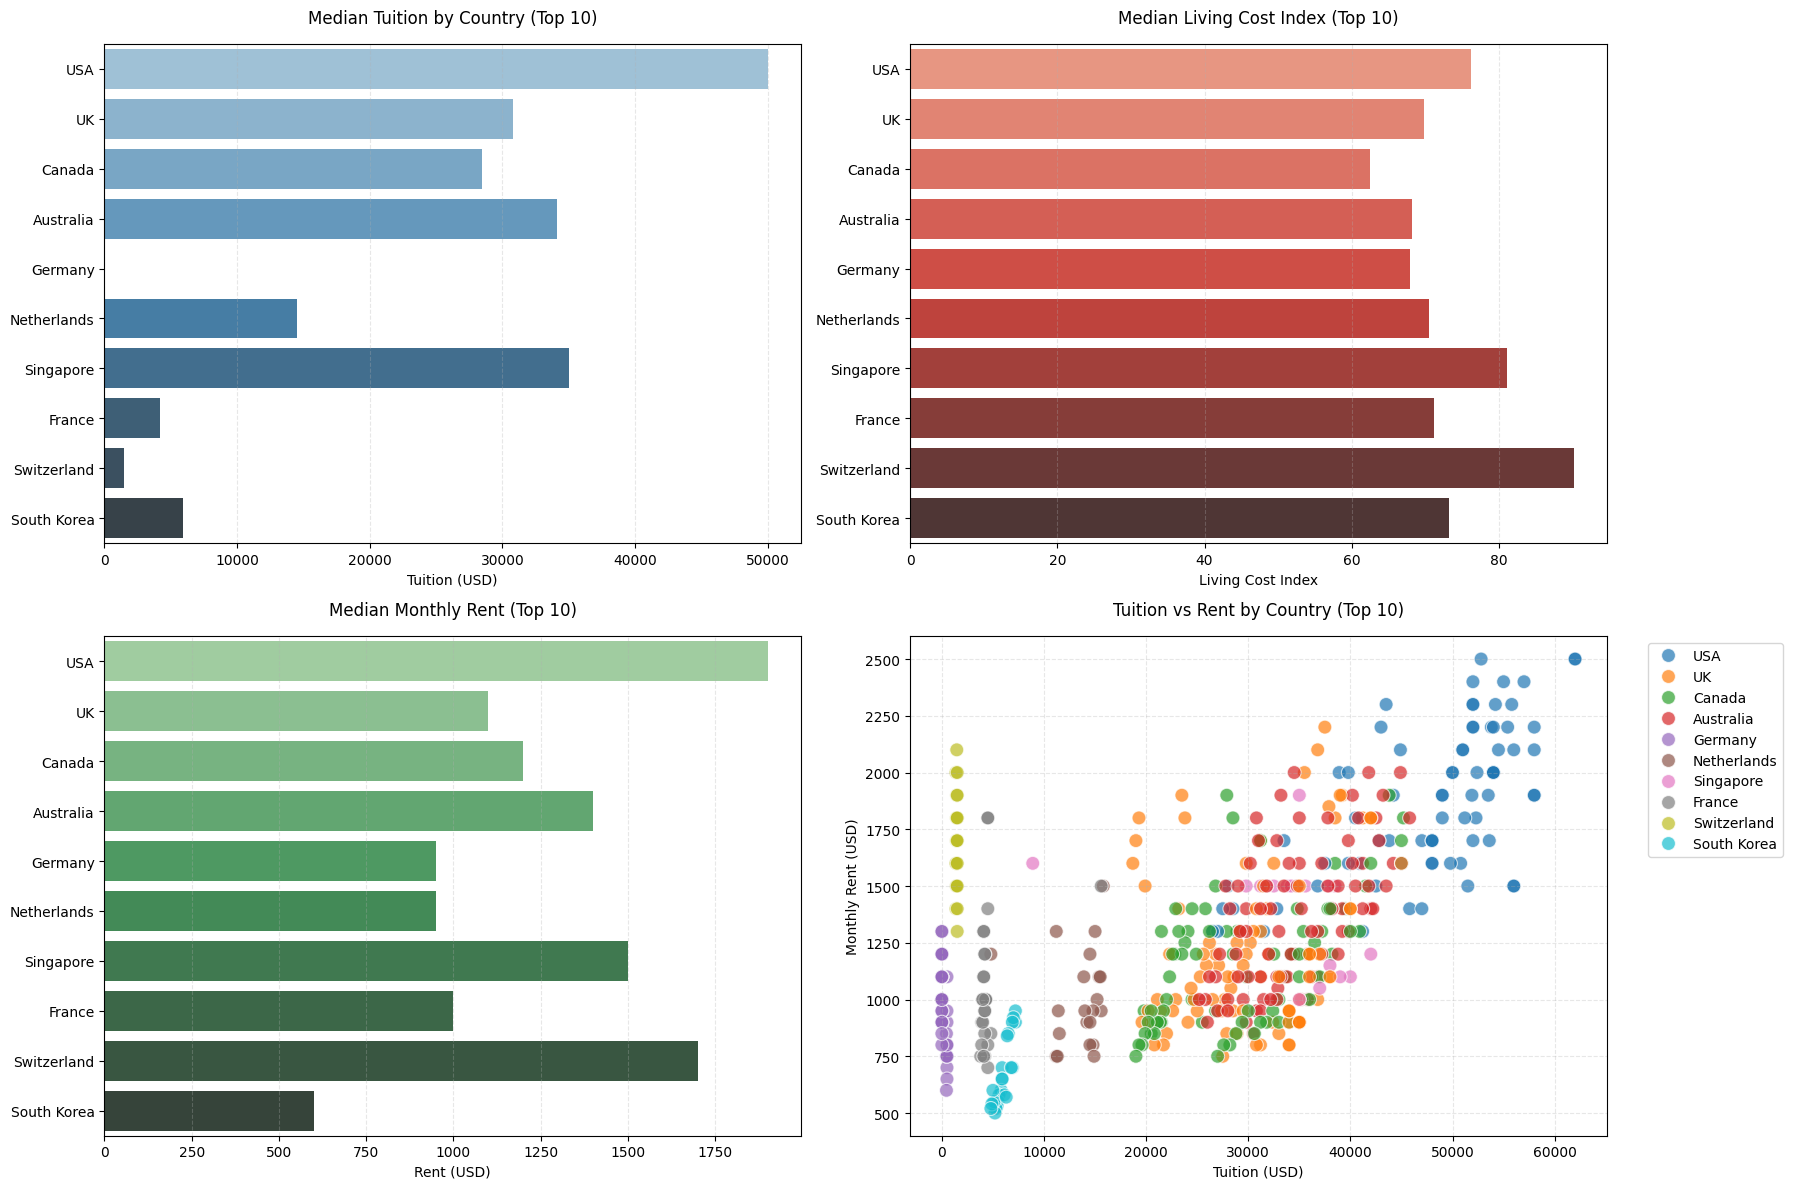

In [ ]:
# Get top 10 countries by number of programs


top_countries = df['Country'].value_counts().head(10).index
df_top = df[df['Country'].isin(top_countries)]

# Set up the figure with a larger size
plt.figure(figsize=(18, 12))

# 1. Tuition Comparison (Top 10 Countries)
plt.subplot(2, 2, 1)
sns.barplot(
    x='Tuition_USD', 
    y='Country', 
    data=df_top, 
    estimator='median',
    errorbar=None,
    palette='Blues_d'
)
plt.title('Median Tuition by Country (Top 10)', fontsize=12, pad=15)
plt.xlabel('Tuition (USD)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# 2. Living Cost Comparison (Top 10)
plt.subplot(2, 2, 2)
sns.barplot(
    x='Living_Cost_Index', 
    y='Country', 
    data=df_top, 
    estimator='median',
    errorbar=None,
    palette='Reds_d'
)
plt.title('Median Living Cost Index (Top 10)', fontsize=12, pad=15)
plt.xlabel('Living Cost Index')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# 3. Rent Comparison (Top 10)
plt.subplot(2, 2, 3)
sns.barplot(
    x='Rent_USD', 
    y='Country', 
    data=df_top, 
    estimator='median',
    errorbar=None,
    palette='Greens_d'
)
plt.title('Median Monthly Rent (Top 10)', fontsize=12, pad=15)
plt.xlabel('Rent (USD)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# 4. Scatter Plot: Tuition vs Rent (Top 10)
plt.subplot(2, 2, 4)
sns.scatterplot(
    x='Tuition_USD', 
    y='Rent_USD', 
    hue='Country',
    data=df_top,
    s=100,
    alpha=0.7
)
plt.title('Tuition vs Rent by Country (Top 10)', fontsize=12, pad=15)
plt.xlabel('Tuition (USD)')
plt.ylabel('Monthly Rent (USD)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()# 4. Total Cost of Education (Stacked Bar Chart)
plt.figure(figsize=(15, 10))

# Calculate average costs by country
cost_components = df_top.groupby('Country').agg({
    'Tuition_USD': 'median',
    'Rent_USD': lambda x: (x * 12).median(),  # Annual rent
    'Living_Cost_Index': lambda x: (x * 1000).median()  # Annual living cost estimate
}).sort_values('Tuition_USD', ascending=False)

# Create stacked bar chart
cost_components.plot(kind='barh', stacked=True, 
                    color=['#1f77b4', '#ff7f0e', '#2ca02c'],
                    figsize=(15, 8))

plt.title('Average Annual Education Cost by Country (Top 10)', fontsize=14, pad=15)
plt.xlabel('Total Cost (USD)', fontsize=12)
plt.ylabel('')
plt.legend(['Tuition', 'Annual Rent', 'Estimated Annual Living Cost'],
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Add total cost labels
for i, (tuition, rent, living) in enumerate(zip(cost_components['Tuition_USD'], 
                                              cost_components['Rent_USD'],
                                              cost_components['Living_Cost_Index'])):
    total = tuition + rent + living
    plt.text(total + 1000, i, f'${total:,.0f}', 
             va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

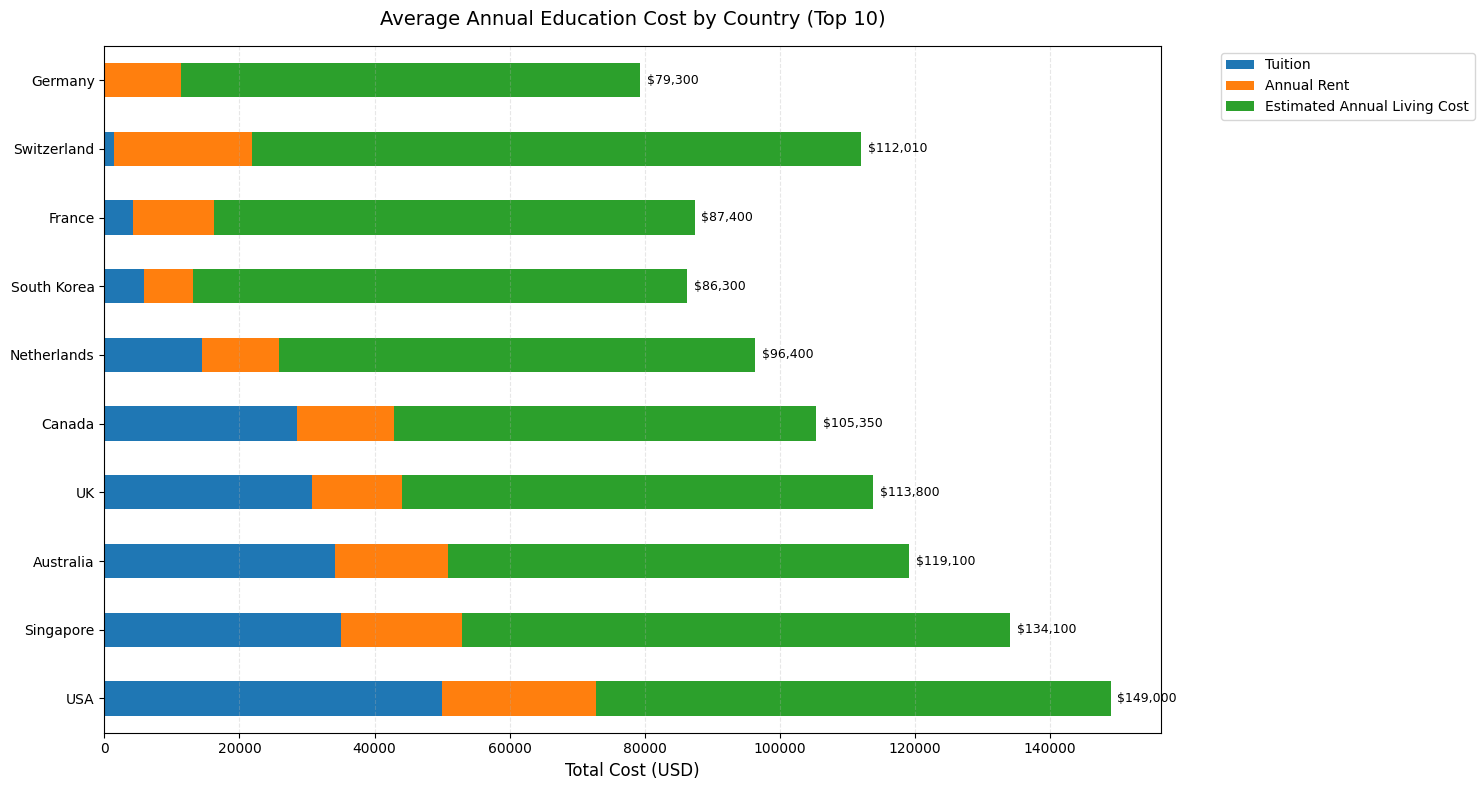

In [16]:
# 4. Total Cost of Education (Stacked Bar Chart)
plt.figure(figsize=(15, 10))

# Calculate average costs by country
cost_components = df_top.groupby('Country').agg({
    'Tuition_USD': 'median',
    'Rent_USD': lambda x: (x * 12).median(),  # Annual rent
    'Living_Cost_Index': lambda x: (x * 1000).median()  # Annual living cost estimate
}).sort_values('Tuition_USD', ascending=False)

# Create stacked bar chart
cost_components.plot(kind='barh', stacked=True, 
                    color=['#1f77b4', '#ff7f0e', '#2ca02c'],
                    figsize=(15, 8))

plt.title('Average Annual Education Cost by Country (Top 10)', fontsize=14, pad=15)
plt.xlabel('Total Cost (USD)', fontsize=12)
plt.ylabel('')
plt.legend(['Tuition', 'Annual Rent', 'Estimated Annual Living Cost'],
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Add total cost labels
for i, (tuition, rent, living) in enumerate(zip(cost_components['Tuition_USD'], 
                                              cost_components['Rent_USD'],
                                              cost_components['Living_Cost_Index'])):
    total = tuition + rent + living
    plt.text(total + 1000, i, f'${total:,.0f}', 
             va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

In [ ]:
''' 
This code creates a stacked horizontal bar chart that visualizes the average annual cost of education across different countries, broken down into three main components. Here's what it shows:

What the Chart Displays
Layout:
    Y-axis: Lists countries (top 10 by some criteria, likely highest total cost)
    X-axis: Shows the total cost in USD
    Bars: Each country has one stacked bar showing three cost components
Cost Components (stacked from left to right):
    Blue: Tuition fees (median)
    Orange: Annual rent (monthly rent × 12)
    Green: Estimated annual living costs (Living Cost Index × 1000)
Total Cost:
    The total length of each bar represents the sum of all three components
    The actual total dollar amount is displayed at the end of each bar

Example Interpretation
For any given country in the chart:
    The leftmost segment (blue) shows the base tuition cost
    The middle segment (orange) adds the annual rent
    The rightmost segment (green) adds estimated living expenses
    The number at the end is the sum of all three

'''

/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_22329/1705572741.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tuition.values, y=top_tuition.index, palette='viridis')
/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_22329/1705572741.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duration_means.values, y=duration_means.index, palette='coolwarm')
/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_22329/1705572741.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=level_counts.values, y=leve

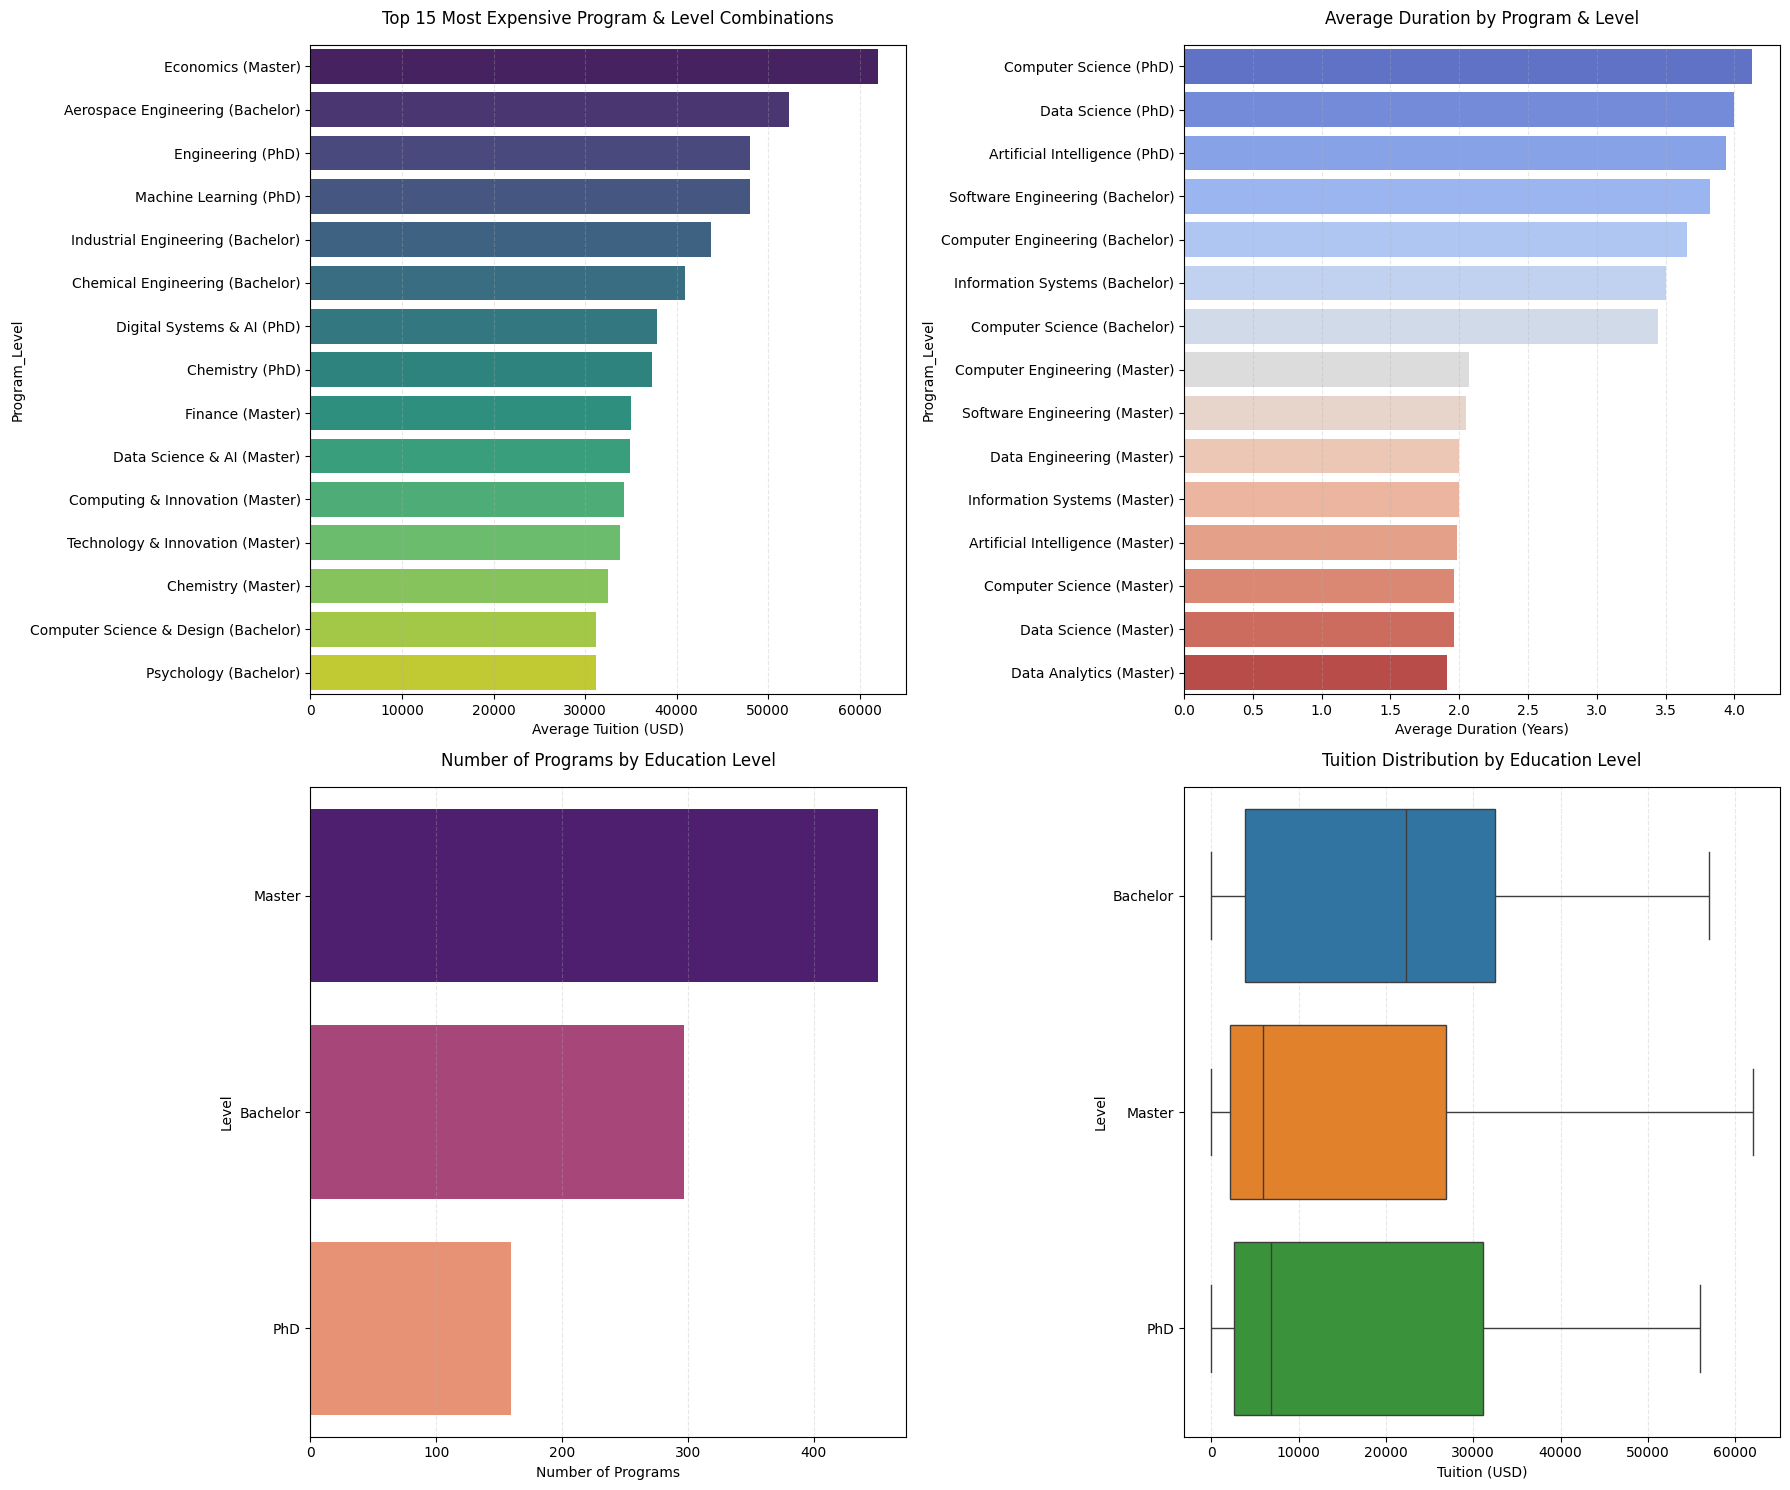


Program Finder: Find programs based on your criteria
Available filters:
- Max Tuition (USD)
- Program Level (Bachelor/Master/PhD)
- Country
- Minimum Duration (years)
- Maximum Duration (years)



In [20]:
# Create a new column combining Program and Level
df['Program_Level'] = df['Program'] + ' (' + df['Level'] + ')'

# Set up the figure with a larger size
plt.figure(figsize=(18, 15))

# 1. Top Programs by Tuition (with Level)
plt.subplot(2, 2, 1)
# Get top 15 programs by average tuition
top_tuition = df.groupby('Program_Level')['Tuition_USD'].mean().nlargest(15)
sns.barplot(x=top_tuition.values, y=top_tuition.index, palette='viridis')
plt.title('Top 15 Most Expensive Program & Level Combinations', fontsize=12, pad=15)
plt.xlabel('Average Tuition (USD)')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# 2. Program Duration by Program & Level
plt.subplot(2, 2, 2)
# Get top 15 most common program-level combinations
common_progs = df['Program_Level'].value_counts().head(15).index
df_common = df[df['Program_Level'].isin(common_progs)]
duration_means = df_common.groupby('Program_Level')['Duration_Years'].mean().sort_values(ascending=False)
sns.barplot(x=duration_means.values, y=duration_means.index, palette='coolwarm')
plt.title('Average Duration by Program & Level', fontsize=12, pad=15)
plt.xlabel('Average Duration (Years)')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# 3. Program Popularity by Level
plt.subplot(2, 2, 3)
# Count programs by level
level_counts = df['Level'].value_counts()
sns.barplot(x=level_counts.values, y=level_counts.index, palette='magma')
plt.title('Number of Programs by Education Level', fontsize=12, pad=15)
plt.xlabel('Number of Programs')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# 4. Tuition Range by Program Level
plt.subplot(2, 2, 4)
sns.boxplot(x='Tuition_USD', y='Level', data=df, 
            order=['Bachelor', 'Master', 'PhD'],
            palette='tab10')
plt.title('Tuition Distribution by Education Level', fontsize=12, pad=15)
plt.xlabel('Tuition (USD)')
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Additional: Interactive Program Finder
print("\nProgram Finder: Find programs based on your criteria")
print("="*50)
print("Available filters:")
print("- Max Tuition (USD)")
print("- Program Level (Bachelor/Master/PhD)")
print("- Country")
print("- Minimum Duration (years)")
print("- Maximum Duration (years)\n")

def find_programs(max_tuition=None, level=None, country=None, min_duration=0, max_duration=10):
    mask = (df['Duration_Years'] >= min_duration) & (df['Duration_Years'] <= max_duration)
    if max_tuition:
        mask &= (df['Tuition_USD'] <= max_tuition)
    if level:
        mask &= (df['Level'] == level)
    if country:
        mask &= (df['Country'] == country)
    
    results = df[mask].sort_values('Tuition_USD')
    print(f"\nFound {len(results)} programs matching your criteria:")
    if not results.empty:
        return results[['University', 'Program', 'Level', 'Country', 'Duration_Years', 'Tuition_USD']]
    else:
        return "No programs match your criteria."

# Example usage:
# find_programs(max_tuition=15000, level='Master', min_duration=1, max_duration=2)

In [21]:

# Example usage:
find_programs(max_tuition=15000, level='Master', min_duration=1, max_duration=2)



Found 287 programs matching your criteria:


,University,Program,Level,Country,Duration_Years,Tuition_USD
647,University of Sao Paulo,Computer Science,Master,Brazil,2.0,0
439,University of Bonn,Engineering,Master,Germany,2.0,0
434,University of Cologne,Mathematics,Master,Germany,2.0,0
424,University of Stuttgart,Engineering,Master,Germany,2.0,0
419,Goethe University,Computer Science,Master,Germany,2.0,0
...,...,...,...,...,...,...
545,TU Eindhoven,Artificial Intelligence,Master,Netherlands,2.0,14800
143,University of Groningen,Computing Science,Master,Netherlands,2.0,14800
149,Wageningen University,Bioinformatics,Master,Netherlands,2.0,14900
816,American University Kuwait,Data Engineering,Master,Kuwait,2.0,15000


/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_22329/543993896.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_avg.values, y=country_avg.index, palette='viridis')
/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_22329/543993896.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=living_cost.values, y=living_cost.index, palette='coolwarm')
/var/folders/7h/099t5t950s10yv3y5sz80ls00000gn/T/ipykernel_22329/543993896.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rent_avg.values, y=rent_avg.index, pa

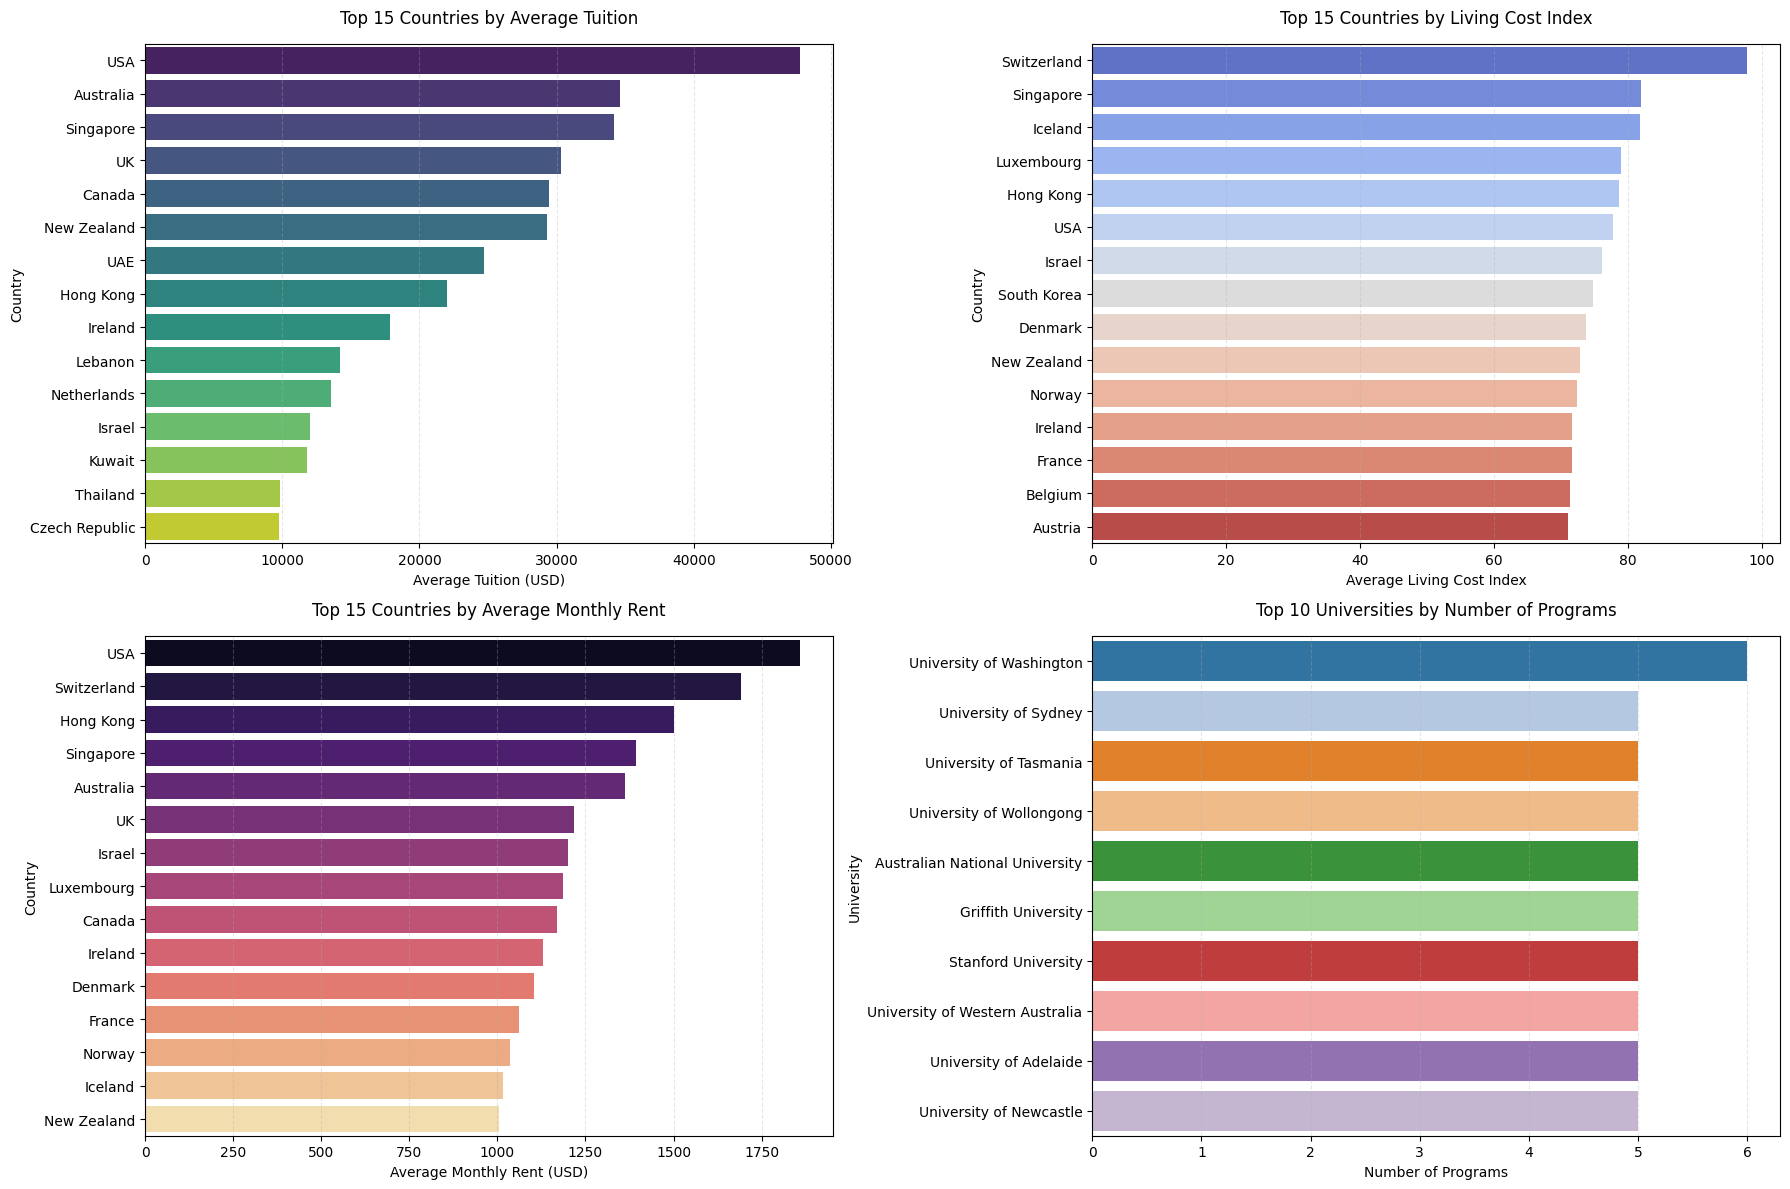


Cost-Effective Programs Analysis

Top 10 Best Value Programs (Lowest Cost per Year):


,University,Program,Level,Country,Duration_Years,Tuition_USD,Cost_Per_Year
434,University of Cologne,Mathematics,Master,Germany,2.0,0,0.0
526,Aarhus University,Engineering Management,Master,Denmark,2.0,0,0.0
525,University of Jena,Photonics,Master,Germany,2.0,0,0.0
524,University of Eastern Finland,Forestry Sciences,PhD,Finland,4.0,0,0.0
523,University of South-Eastern Norway,Systems Engineering,Master,Norway,2.0,0,0.0
522,University of Copenhagen,Bioinformatics,Master,Denmark,2.0,0,0.0
124,University of Sao Paulo,Computer Science,Master,Brazil,2.0,0,0.0
521,RWTH Aachen,Materials Science,Master,Germany,2.0,0,0.0
520,University of Eastern Finland,Environmental Science,Bachelor,Finland,3.0,0,0.0
733,University of Buenos Aires,Computer Science,PhD,Argentina,4.0,0,0.0


In [23]:
# Set up the figure with a larger size
plt.figure(figsize=(18, 12))

# 1. Average Tuition by Country (Top 15)
plt.subplot(2, 2, 1)
country_avg = df.groupby('Country')['Tuition_USD'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=country_avg.values, y=country_avg.index, palette='viridis')
plt.title('Top 15 Countries by Average Tuition', fontsize=12, pad=15)
plt.xlabel('Average Tuition (USD)')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# 2. Average Living Cost by Country (Top 15)
plt.subplot(2, 2, 2)
living_cost = df.groupby('Country')['Living_Cost_Index'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=living_cost.values, y=living_cost.index, palette='coolwarm')
plt.title('Top 15 Countries by Living Cost Index', fontsize=12, pad=15)
plt.xlabel('Average Living Cost Index')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# 3. Average Rent by Country (Top 15)
plt.subplot(2, 2, 3)
rent_avg = df.groupby('Country')['Rent_USD'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=rent_avg.values, y=rent_avg.index, palette='magma')
plt.title('Top 15 Countries by Average Monthly Rent', fontsize=12, pad=15)
plt.xlabel('Average Monthly Rent (USD)')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# 4. Top Universities by Number of Programs
plt.subplot(2, 2, 4)
top_unis = df['University'].value_counts().head(10)
sns.barplot(x=top_unis.values, y=top_unis.index, palette='tab20')
plt.title('Top 10 Universities by Number of Programs', fontsize=12, pad=15)
plt.xlabel('Number of Programs')
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Additional: Cost-Effective Programs Analysis
print("\nCost-Effective Programs Analysis")
print("="*50)

# Calculate cost per year of study
df['Cost_Per_Year'] = df['Tuition_USD'] / df['Duration_Years']

# Find best value programs (lowest cost per year with good ratings)
if 'Cost_Per_Year' in df.columns:
    print("\nTop 10 Best Value Programs (Lowest Cost per Year):")
    best_value = df[df['Duration_Years'] > 0].sort_values('Cost_Per_Year').head(10)
    display(best_value[['University', 'Program', 'Level', 'Country', 
                       'Duration_Years', 'Tuition_USD', 'Cost_Per_Year']])
else:
    print("\nCould not calculate cost per year - duration data might be missing.")

# University Comparison Tool
def compare_universities(uni1, uni2):
    """
    Compare two universities across various metrics
    """
    uni1_data = df[df['University'].str.contains(uni1, case=False, na=False)]
    uni2_data = df[df['University'].str.contains(uni2, case=False, na=False)]
    
    if uni1_data.empty or uni2_data.empty:
        print("One or both universities not found. Please check the names and try again.")
        return
    
    print(f"\nComparison: {uni1.upper()} vs {uni2.upper()}")
    print("-" * 50)
    
    # Compare average metrics
    metrics = ['Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Duration_Years']
    comparison = pd.DataFrame({
        'Metric': metrics,
        uni1: uni1_data[metrics].mean().values,
        uni2: uni2_data[metrics].mean().values
    })
    
    # Add percentage difference
    comparison['Difference'] = ((comparison[uni1] - comparison[uni2]) / comparison[uni2] * 100).round(1)
    comparison['Difference'] = comparison['Difference'].astype(str) + '%'
    
    display(comparison)
    
    # Show unique programs
    print("\nUnique Programs:")
    print(f"{uni1}: {', '.join(uni1_data['Program'].unique()[:5])}" + 
          ("..." if len(uni1_data) > 5 else ""))
    print(f"{uni2}: {', '.join(uni2_data['Program'].unique()[:5])}" + 
          ("..." if len(uni2_data) > 5 else ""))

# Example usage:
# compare_universities("Stanford", "MIT")

In [24]:
compare_universities("Stanford", "MIT")


Comparison: STANFORD vs MIT
--------------------------------------------------


,Metric,Stanford,MIT,Difference
0,Tuition_USD,54040.0,45866.666667,17.8%
1,Living_Cost_Index,89.7,77.866667,15.2%
2,Rent_USD,2340.0,1900.000000,23.2%
3,Duration_Years,4.2,3.333333,26.0%



Unique Programs:
Stanford: Computer Science, Physics, Data Science
MIT: Electrical Engineering, Computer Science...


In [28]:
def get_country_insights(country_name):
    """
    Get detailed insights for a specific country.
    
    Parameters:
    country_name (str): Name of the country to analyze
    
    Returns:
    None (prints the insights)
    """
    # Check if country exists in the data
    if country_name not in df['Country'].unique():
        print(f"Country '{country_name}' not found in the dataset. Please check the spelling.")
        similar = df[df['Country'].str.contains(country_name, case=False, na=False)]['Country'].unique()
        if len(similar) > 0:
            print(f"\nDid you mean one of these?")
            for c in similar:
                print(f"- {c}")
        return
    
    # Filter data for the country
    country_df = df[df['Country'] == country_name]
    
    # Calculate metrics
    num_programs = len(country_df)
    avg_tuition = country_df['Tuition_USD'].mean()
    avg_living_cost = country_df['Living_Cost_Index'].mean()
    most_common_program = country_df['Program'].value_counts().index[0]
    typical_duration = country_df['Duration_Years'].median()
    most_expensive = country_df.loc[country_df['Tuition_USD'].idxmax()]
    
    # Print basic insights
    print(f"\n{'='*50}")
    print(f"EDUCATION INSIGHTS FOR: {country_name.upper()}")
    print("="*50)
    print(f"\n📊 Basic Statistics")
    print("-" * 40)
    print(f"Number of programs: {num_programs}")
    print(f"Average Tuition: ${avg_tuition:,.0f}")
    print(f"Average Living Cost Index: {avg_living_cost:.1f}")
    print(f"Most common program: {most_common_program}")
    print(f"Typical duration: {typical_duration:.1f} years")
    print(f"Most expensive program: {most_expensive['Program']} (${most_expensive['Tuition_USD']:,.0f} at {most_expensive['University']})")
    
    # Top 5 most expensive programs
    print(f"\n💎 Top 5 Most Expensive Programs")
    print("-" * 40)
    expensive = country_df.nlargest(5, 'Tuition_USD')[['University', 'Program', 'Level', 'Tuition_USD']]
    for idx, row in expensive.iterrows():
        print(f"- {row['Program']} ({row['Level']}) at {row['University']}: ${row['Tuition_USD']:,.0f}")
    
    # Top 5 most common programs
    print(f"\n📚 Top 5 Most Common Programs")
    print("-" * 40)
    common = country_df['Program'].value_counts().head(5)
    for prog, count in common.items():
        print(f"- {prog}: {count} programs")
    
    # Cost comparison with other countries
    print(f"\n🌍 How {country_name} Compares")
    print("-" * 40)
    global_avg_tuition = df['Tuition_USD'].mean()
    comparison = "higher" if avg_tuition > global_avg_tuition else "lower"
    print(f"- Tuition is {abs(avg_tuition - global_avg_tuition):.0%} {comparison} than global average")
    
    # Print some recommendations
    print(f"\n💡 Recommendations")
    print("-" * 40)
    if avg_tuition > global_avg_tuition:
        cheaper_countries = df[df['Tuition_USD'] < avg_tuition]['Country'].value_counts().index[:3]
        print(f"Consider these more affordable countries: {', '.join(cheaper_countries)}")
    else:
        print("This country offers relatively affordable education options!")
    
    print("="*50 + "\n")

# Example usage:
# get_country_insights("United States")
# get_country_insights("Germany")
# get_country_insights("Japan")

In [31]:
get_country_insights("Japan")


EDUCATION INSIGHTS FOR: JAPAN

📊 Basic Statistics
----------------------------------------
Number of programs: 12
Average Tuition: $7,875
Average Living Cost Index: 68.0
Most common program: Information Science
Typical duration: 2.5 years
Most expensive program: Information Science ($8,900 at University of Tokyo)

💎 Top 5 Most Expensive Programs
----------------------------------------
- Information Science (Master) at University of Tokyo: $8,900
- Artificial Intelligence (PhD) at Tokyo Institute of Technology: $8,900
- Computer Science (Master) at Kyoto University: $8,500
- Software Engineering (Master) at Tohoku University: $8,200
- Data Science (Master) at Hokkaido University: $8,100

📚 Top 5 Most Common Programs
----------------------------------------
- Information Science: 2 programs
- Computer Science: 2 programs
- Software Engineering: 2 programs
- Engineering: 1 programs
- Computer Engineering: 1 programs

🌍 How Japan Compares
----------------------------------------
- Tuitio